# Introduction

In order to solve time series problem indicated in assignment paper I will be using Cross-Industry Process for Data Mining (CRISP-DM) as methodology. CRISP-DM methodology provides a structured approach to planning a data mining project. It is a robust and well-proven methodology. It is composed of six phases:
1. Business understanding
2. Data understanding
3. Data preparation
4. Modeling
5. Evaluation
6. Deployment

# 1. Business understanding

Business has time series data about daily worker counts and needs to better understanding this data in order to more accurate worker count planning and predictions.

# 2-3. Data understanding and preparation

I choose Python as a programming language. Because it is interpretable, no need to compile, interactive use, datascientist friendly and widely used to solve datascience problems. I use Pandas library for data exploration and preperation.

In [1]:
# Import libs 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read dataset. While reading make date column dataframe index and parse date column as timestamp
dataframe = pd.read_csv("assignment.csv", parse_dates=['date'], index_col="date")

In [3]:
# First overview of dataset
dataframe.head()

,daily worker count
date,
2013-01-24,1
2013-01-25,1
2013-01-26,1
2013-01-27,2
2013-01-29,1


In [4]:
# Check nulls
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1647 entries, 2013-01-24 to 2017-07-31
Data columns (total 1 columns):
daily worker count    1647 non-null int64
dtypes: int64(1)
memory usage: 25.7 KB


No null values. Both date and daily worker count are consistent in terms of row counts.

In [5]:
# As we see above. The index is not sorted. We should sort it. 
# Sort index and assign dataframe again
dataframe = dataframe.sort_index()

In [6]:
# Let's see if dataframe index is sorted?
dataframe.head()

,daily worker count
date,
2013-01-02,4
2013-01-03,4
2013-01-04,5
2013-01-05,4
2013-01-06,4


In [7]:
# change column names. We don't want blanks in column names. So we replace underscores.
# create new python list for new column names
column_names = ['daily_worker_count']

In [8]:
# assign newly created column names list to dataframe columns
dataframe.columns = column_names

In [9]:
# Check if new column names is assigned
dataframe.columns

Index(['daily_worker_count'], dtype='object')

## Graphical overview to timeseries

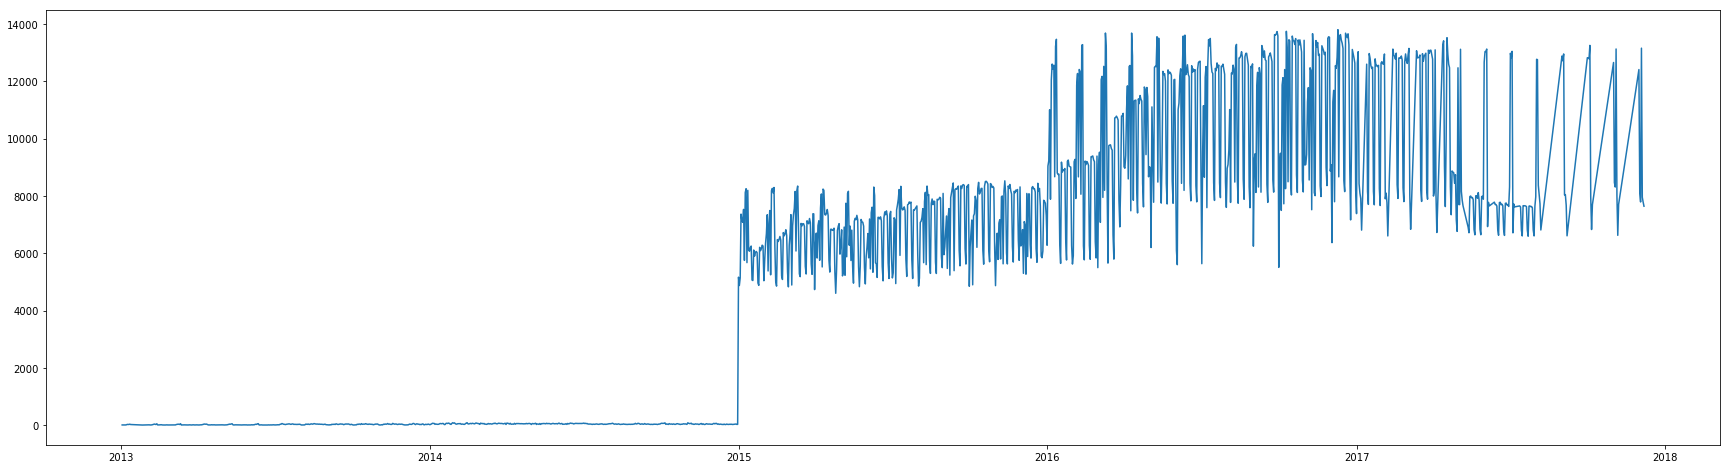

In [10]:

# convert pandas series
dataframe_pd_series = dataframe['daily_worker_count']
# declare the canvas size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30, 8

# Plot time series
plt.plot(dataframe_pd_series)

## Interpretation of graph

Between 2013 and 2015 work counts are so low but sharp increase in 2015. We can examine the time series into 4 period:
1. 2013-2015 period: stable and low variance, no significant trend.
2. In 2015 variance increses along with daily work count, slight increasing trend.
3. From beginning of 2016 to mid 2017 variance is greater than 2015. We also see highest work counts during this period. No significant trend.
4. In the scond half of 2017 variance seems same as previous period but data looses intensity 

In [11]:
# Extract new features from dataframe index(datetimeindex)
# We create three new features 
dataframe['year'] = dataframe.index.year
dataframe['day_of_month'] = dataframe.index.day
dataframe['month'] = dataframe.index.month
dataframe['day_of_week'] = dataframe.index.dayofweek
dataframe['quarter'] = dataframe.index.quarter
dataframe['week_of_year'] = dataframe.index.weekofyear

In [12]:
# See if new features has properly created
dataframe.head(20)

,daily_worker_count,year,day_of_month,month,day_of_week,quarter,week_of_year
date,,,,,,,
2013-01-02,4,2013,2,1,2,1,1
2013-01-03,4,2013,3,1,3,1,1
2013-01-04,5,2013,4,1,4,1,1
2013-01-05,4,2013,5,1,5,1,1
2013-01-06,4,2013,6,1,6,1,1
2013-01-07,9,2013,7,1,0,1,2
2013-01-08,22,2013,8,1,1,1,2
2013-01-09,20,2013,9,1,2,1,2
2013-01-10,20,2013,10,1,3,1,2


In [13]:
# Check outliers in year, month and day
print("max month:", dataframe.month.max())
print("min month:", dataframe.month.min())
print("max year:", dataframe.year.max())
print("min year:", dataframe.year.min())
print("max day of month:", dataframe.day_of_month.max())
print("min day of month:", dataframe.day_of_month.min())
print("max day of week:", dataframe.day_of_week.max())
print("min day of week:", dataframe.day_of_week.min())

max month: 12
min month: 1
max year: 2017
min year: 2013
max day of month: 31
min day of month: 1
max day of week: 6
min day of week: 0


No outliers in new features

# Weekday distribution

In [14]:
# Let's see how data distributed along with day of week
dataframe.groupby('day_of_week').daily_worker_count.agg(['count','min','max','sum','mean'])

,count,min,max,sum,mean
day_of_week,,,,,
0,234,2,13750,1294577,5532.380342
1,236,1,13635,1278061,5415.512712
2,234,2,13655,1250288,5343.111111
3,237,1,13740,1290215,5443.945148
4,236,1,13584,1284432,5442.508475
5,236,1,13806,1037281,4395.258475
6,234,2,13688,999648,4272.000000


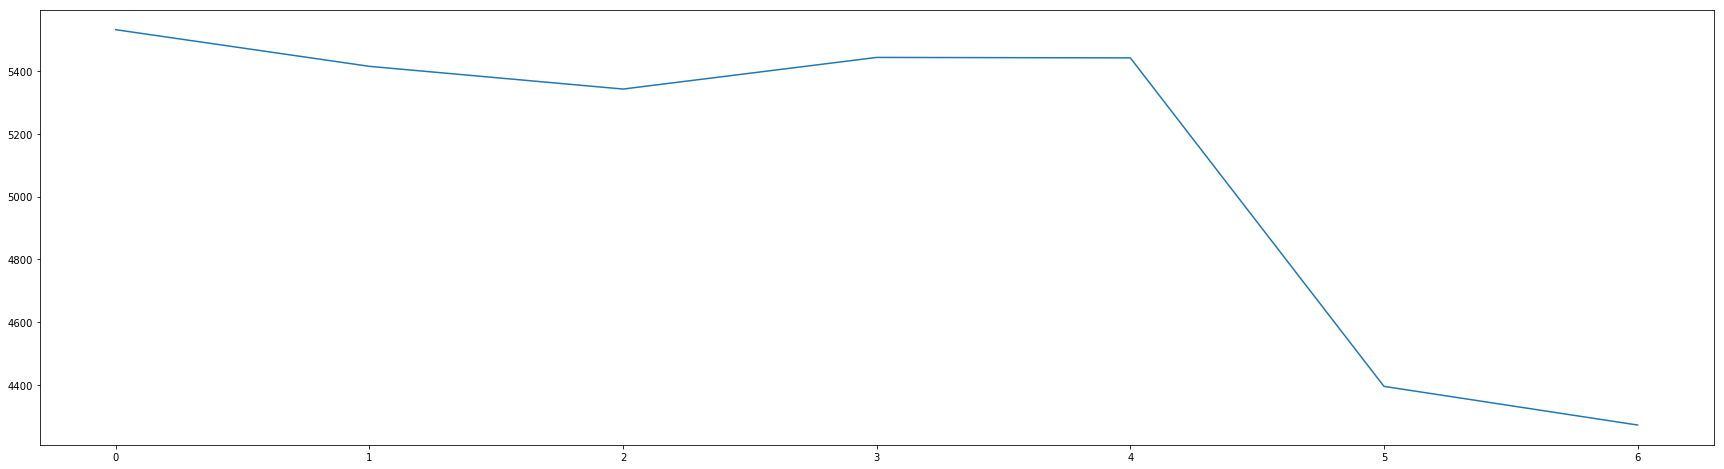

In [15]:
plt.plot(dataframe.groupby('day_of_week').daily_worker_count.mean())
plt.show()

In [16]:
# As we see above 5 and 6 days have significantly smaller work counts in both mean and sum.
# So we should better create new feature that indicates weekend or not.
is_weekend = []
for i in dataframe.day_of_week:
    if i >= 5:
        is_weekend.append(1)
    else:
        is_weekend.append(0)
        
dataframe['is_weekend'] = is_weekend

In [17]:
# check is_weekend is added
dataframe.head()

,daily_worker_count,year,day_of_month,month,day_of_week,quarter,week_of_year,is_weekend
date,,,,,,,,
2013-01-02,4,2013,2,1,2,1,1,0
2013-01-03,4,2013,3,1,3,1,1,0
2013-01-04,5,2013,4,1,4,1,1,0
2013-01-05,4,2013,5,1,5,1,1,1
2013-01-06,4,2013,6,1,6,1,1,1


### Distribution of work days seems balanced saturday and sunday average worker count is less than work days, and sunday is also less than saturday

# Monthly distribution

In [18]:
# Let's see how data distributed along with month of year
dataframe.groupby('month').daily_worker_count.agg(['count','min','max','sum','mean'])

,count,min,max,sum,mean
month,,,,,
1,136,1,13471,749853,5513.625000
2,134,2,13283,701259,5233.276119
3,149,2,13689,804156,5397.020134
4,144,2,13688,756928,5256.444444
5,149,2,13559,738969,4959.523490
6,144,2,13617,740834,5144.680556
7,149,3,13500,767781,5152.892617
8,130,3,13292,628745,4836.500000
9,126,4,13740,633937,5031.246032


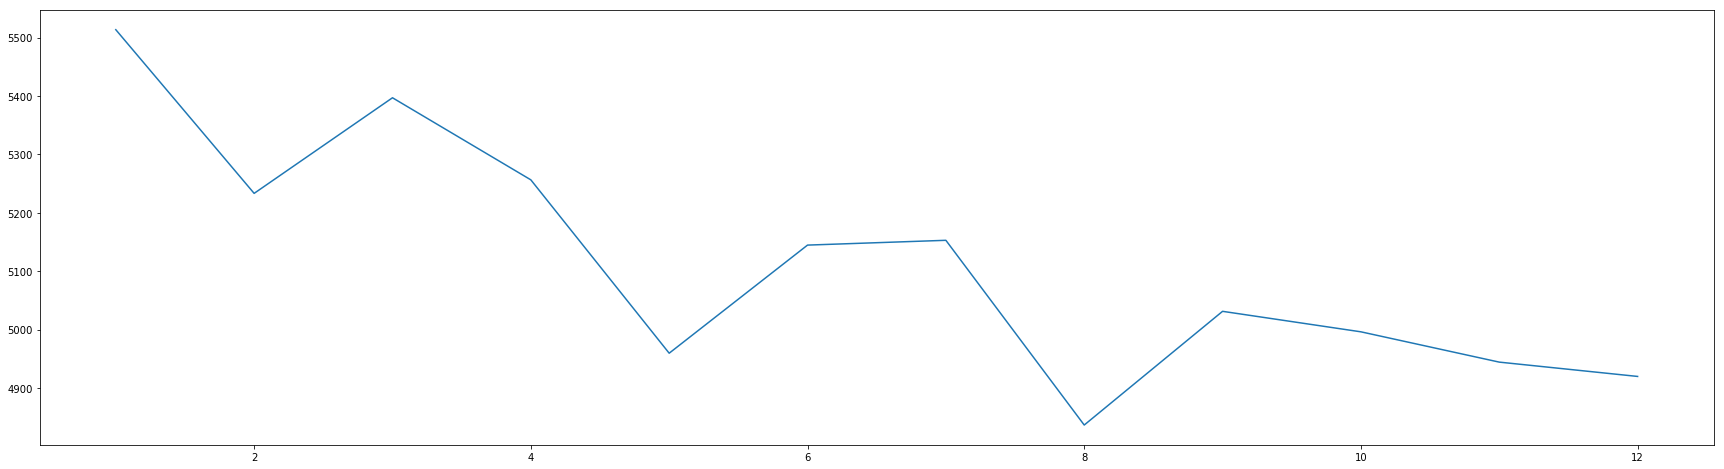

In [19]:
plt.plot(dataframe.groupby('month').daily_worker_count.mean())
plt.show()

### Significant decreasing trend in monthly worker counts

# Quarterly Distribution

In [20]:
# Let's see how data distributed along with quarter
dataframe.groupby('quarter').daily_worker_count.agg(['count','min','max','sum','mean'])

,count,min,max,sum,mean
quarter,,,,,
1,419,1,13689,2255268,5382.501193
2,437,2,13688,2236731,5118.377574
3,405,3,13740,2030463,5013.488889
4,386,2,13806,1912040,4953.471503


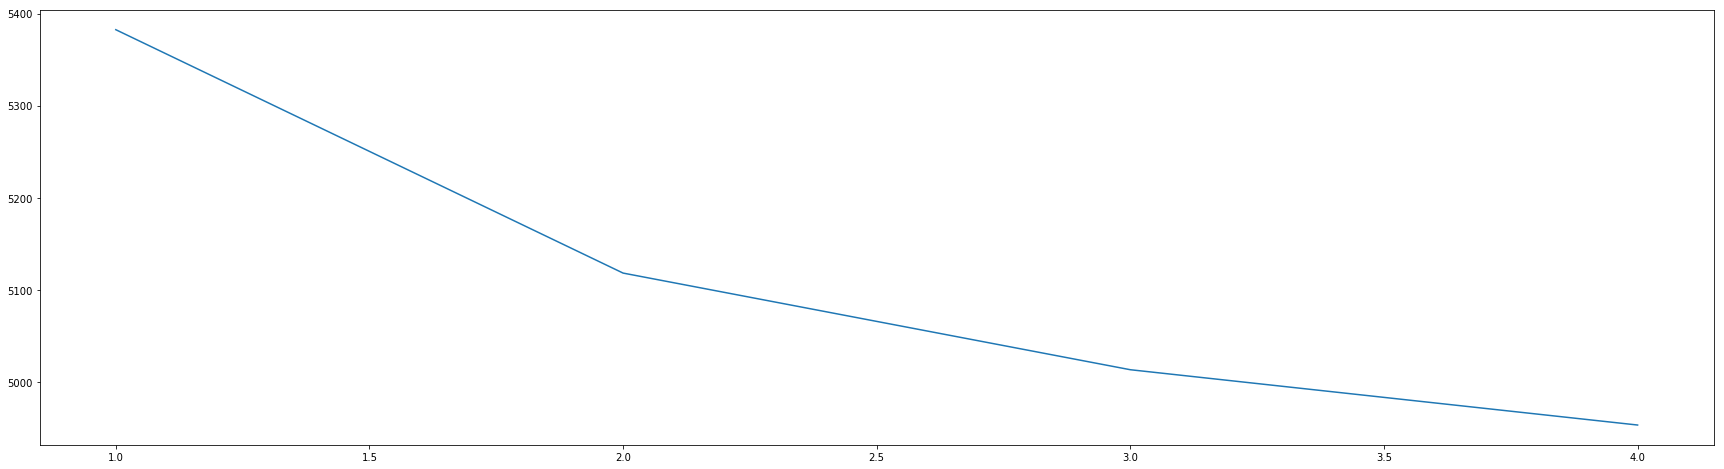

In [21]:
plt.plot(dataframe.groupby('quarter').daily_worker_count.mean())
plt.show()

# Yearly Distribution

In [22]:
# Let's see how data distributed along with year
dataframe.groupby('year').daily_worker_count.agg(['count','min','max','sum','mean'])

,count,min,max,sum,mean
year,,,,,
2013,339,1,58,6249,18.433628
2014,365,13,82,15145,41.493151
2015,365,4601,8528,2498773,6845.953425
2016,366,5497,13806,3876005,10590.177596
2017,212,6594,13526,2038330,9614.764151


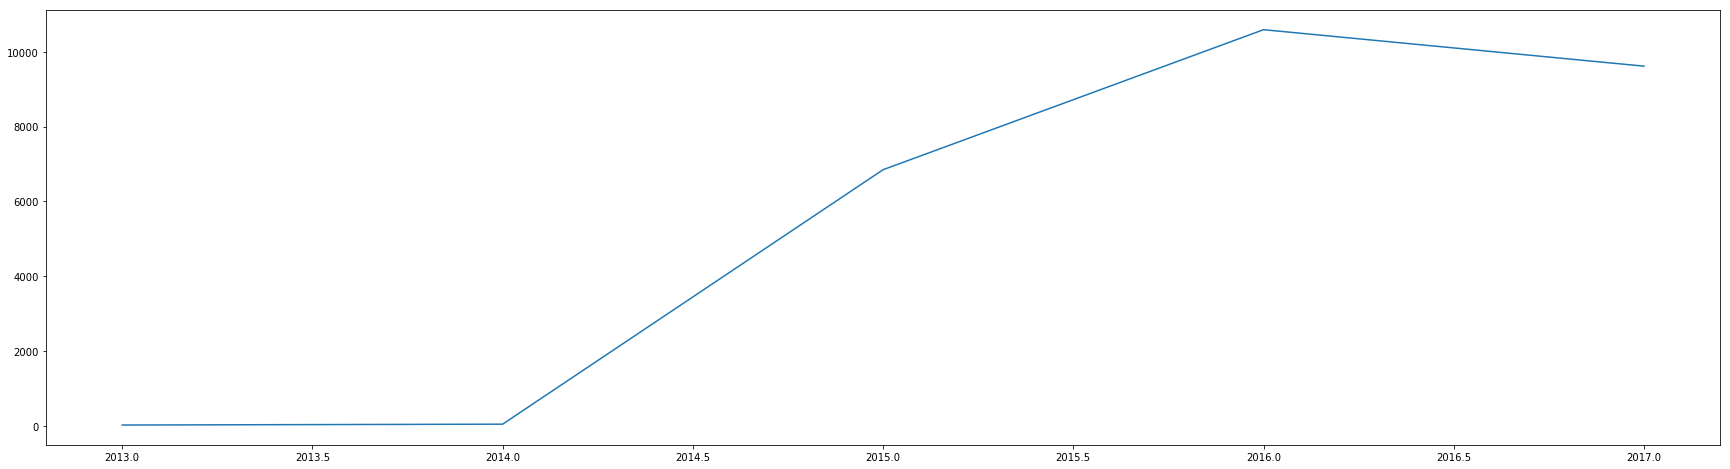

In [23]:
plt.plot(dataframe.groupby('year').daily_worker_count.mean())
plt.show()

### Sudden increase in 2015. Highest worker counts in 2016 and slight decrease in 2017.

# 4. Modeling
## Building Machine Learning Model

# 1'st Model:RandomForestRegressor whole data

In [24]:
# Split columns into features and target values
X = dataframe.iloc[:, 1:].values
y = dataframe.iloc[:, 0].values

In [25]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf_whole = RandomForestRegressor(n_estimators=100, random_state = 42)
regressor_rf_whole.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [26]:
y_pred_rf_whole = regressor_rf_whole.predict(X)

First; this is a regression problem.
Second; since our data is not linear we better use nonlinear regression models.


In [27]:
from sklearn.metrics import r2_score
r2_score(y, y_pred_rf_whole)

0.99449177892994745

In [28]:
X.shape

(1647, 7)

# 2'nd Model: RandomForestRegressor with train dataset

r2_score is so high the model seems overfitted, to prevent it let's use split data into train and test.

In [29]:
# Split dataset into train and test set
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators=100, random_state = 0)
regressor_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [31]:
y_pred_rf = regressor_rf.predict(X_test)

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_rf)

0.96269063367041263

In [33]:
X_train.shape

(1317, 7)

## Prediction Function

In [34]:
'''
# Give the dates of list to be predicted in a csv file. Header must be date.
# Example:

date
01/01/2017
01/02/2016
01/03/2015
01/04/2015
01/05/2017
'''
def featureMarixMaker(will_predicted_csv):
    import pandas as pd
    df = pd.read_csv(will_predicted_csv, parse_dates=['date'], index_col="date")
    df['year'] = df.index.year
    df['day_of_month'] = df.index.day
    df['month'] = df.index.month
    df['day_of_week'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['week_of_year'] = df.index.weekofyear
    is_weekend = []
    for i in df.day_of_week:
        if i >= 5:
            is_weekend.append(1)
        else:
            is_weekend.append(0)

    df['is_weekend'] = is_weekend
    X = df.iloc[:, 0:].values
    return X

In [35]:
# Using featureMarixMaker() function, create a feature matrix
# Don't forget to create csv file including dates to predict in working directory
XX = featureMarixMaker("assignment_pred.csv")

# Prediction
print(regressor_rf.predict(XX))

[ 7776.42  8977.19  6479.73  6094.03  8202.56]


# 3'rd Model: GradientBoostingRegressor

In [36]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# Prepare the parameters
params = {'n_estimators': 200, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

# Create GradientBoostingRegressor object with parameters
regressor_gb = ensemble.GradientBoostingRegressor(**params)

# Train GradientBoostingRegressor object with train set
regressor_gb.fit(X_train, y_train)

# Test the model with test set and  compute mean square error (mse)
mse = mean_squared_error(y_test, regressor_gb.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 1491425.1392


In [37]:
# Make predictions by using trained model. 
y_pred_gb = regressor_gb.predict(X_test)

In [38]:
r2_score(y_test, y_pred_gb)

0.93333081836762943

In [39]:
# Using featureMarixMaker() function, create a feature matrix 
# Don't forget to create csv file in including dates to predict in working directory
XX = featureMarixMaker("assignment_pred.csv")

# Prediction
print(regressor_gb.predict(XX))

[ 8942.13998221  8866.04756578  6413.83108915  6413.83108915  9405.852133  ]
